# Create Data for PCA

In [238]:
import numpy as np
import math
np.random.seed(4294967295) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 500).T
class1_sample

array([[ 0.64840867,  0.28450104, -0.04402602, ...,  1.92621849,
        -0.2495552 , -0.98662194],
       [ 0.66932353,  0.11388774,  0.24877162, ...,  0.05198224,
        -0.17248901,  1.55903935],
       [-1.08054372,  0.86762189, -0.98823015, ..., -1.09070152,
         2.34189275, -0.03408062]])

Populating the interactive namespace from numpy and matplotlib


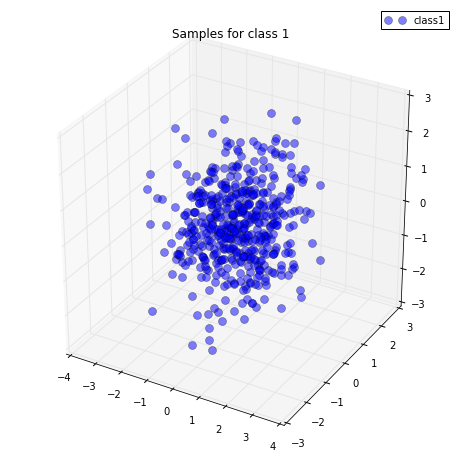

In [239]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')

plt.title('Samples for class 1')
ax.legend(loc='upper right')

plt.show()

In [240]:
all_samples = class1_sample
print 'sample data'
np.shape(all_samples)

sample data


(3, 500)

# PCA

In [241]:
from sklearn.decomposition import PCA as sklearnPCA

In [282]:
print shape(all_samples.T)
pca = sklearnPCA(n_components=3)
fitted = pca.fit(all_samples.T)
trans = pca.transform(all_samples.T)
print shape(trans)

(500, 3)
(500, 3)


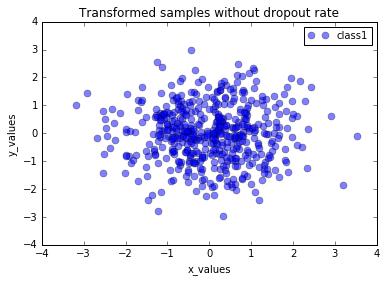

In [283]:
plt.plot(trans[:,0],trans[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples without dropout rate')

plt.show()

# Apply Drop Out rate ($e^{-\lambda\mu^2}$)

In [244]:
lmbda = -1
mu = 2
p_0 = math.e**(lmbda * mu**2)
p_0

0.018315638888734186

# recover PCA

In [284]:
shape(trans)

(500, 3)

In [285]:
pca = sklearnPCA(n_components=3)
fitted = pca.fit(all_samples.T)
red = np.dot(all_samples.T - pca.mean_, pca.components_.T)
original = np.dot(red, pca.components_) + pca.mean_

In [286]:
original

array([[ 0.64840867,  0.66932353, -1.08054372],
       [ 0.28450104,  0.11388774,  0.86762189],
       [-0.04402602,  0.24877162, -0.98823015],
       ..., 
       [ 1.92621849,  0.05198224, -1.09070152],
       [-0.2495552 , -0.17248901,  2.34189275],
       [-0.98662194,  1.55903935, -0.03408062]])

In [287]:
all_samples.T

array([[ 0.64840867,  0.66932353, -1.08054372],
       [ 0.28450104,  0.11388774,  0.86762189],
       [-0.04402602,  0.24877162, -0.98823015],
       ..., 
       [ 1.92621849,  0.05198224, -1.09070152],
       [-0.2495552 , -0.17248901,  2.34189275],
       [-0.98662194,  1.55903935, -0.03408062]])

In [288]:
np.allclose(pca.inverse_transform(pca.transform(all_samples.T)), all_samples.T)

True

In [294]:
recovered = pca.inverse_transform(pca.transform(all_samples.T))
recovered = recovered.T

In [295]:
# all_samples.T

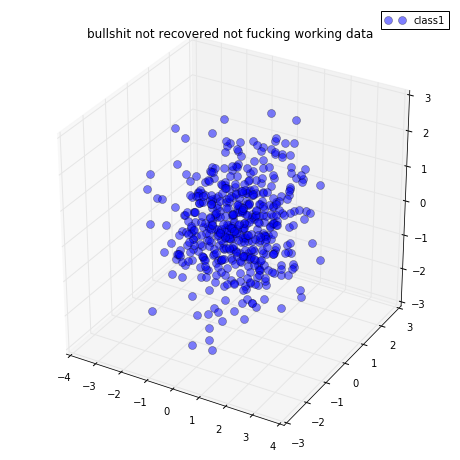

In [296]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(recovered[0,:], recovered[1,:], recovered[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')

plt.title('Recovered Data')
ax.legend(loc='upper right')

plt.show()